This notebook trains an autoencoder on the MNIST dataset to reduce the dimensionality of the images to 2. It then trains the autoencoder and plots the training loss over epochs. Finally, it creates a GIF to visualize the training process.

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load MNIST data
(x_train, y_train), (_, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_train = x_train.reshape((len(x_train), -1))  # Flatten to 784

# Normalize
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Autoencoder architecture
input_dim = x_train_scaled.shape[1]
encoding_dim = 2  # Bottleneck size

input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='linear')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, output)
encoder = Model(input_img, bottleneck)

In [4]:
x_train_10 = x_train[:10]
x_train_scaled_10 = x_train_scaled[:10]

In [5]:
reconstructed_images = autoencoder.predict(x_train_scaled_10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [6]:
autoencoder.compile(optimizer=Adam(), loss='mse')
history = autoencoder.fit(x_train_scaled, x_train_scaled, epochs=300, batch_size=256, shuffle=True).history

Epoch 1/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.9390
Epoch 2/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8479
Epoch 3/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8267
Epoch 4/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8190
Epoch 5/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7960
Epoch 6/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7805
Epoch 7/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8053
Epoch 8/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8121
Epoch 9/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7987
Epoch 10/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8165
Epoch 11/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7936
Epoch 12/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7998
Epoch 13/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8105
Epoch 14/300
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7864
Epoch 15/300
235/235 ━━━━━━━━━━━━━━━━━━━━

## Plot mse vs. epoch

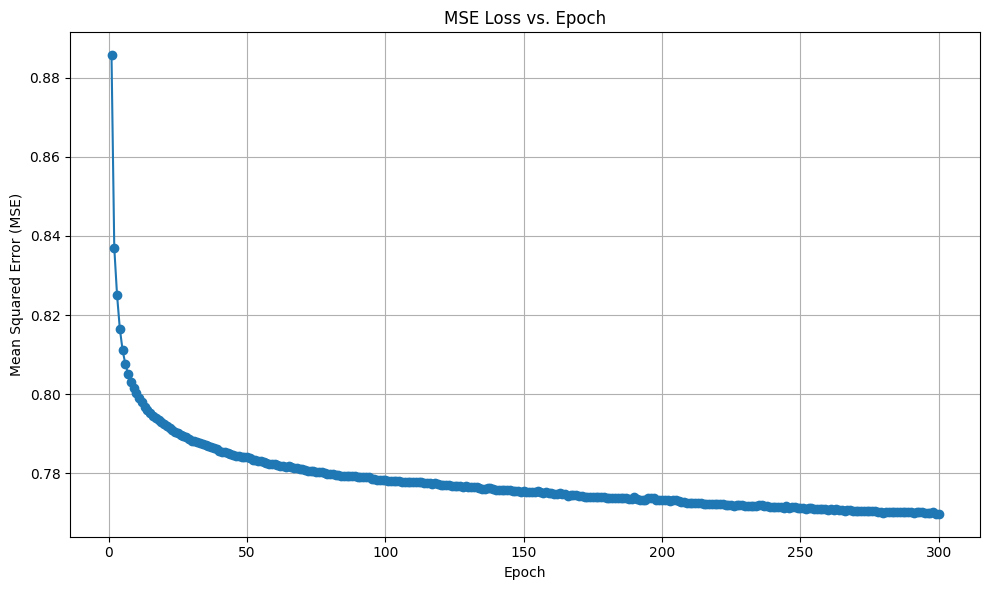

In [7]:
loss_values = history['loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, marker='o', linestyle='-')
plt.title("MSE Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
loss_values = history['loss']
epochs = range(1, len(loss_values) + 1)

for i in range(len(epochs)):
    plt.figure(figsize=(8, 6))
    plt.plot(epochs[:i+1], loss_values[:i+1], marker='o', linestyle='-')
    plt.title(f"MSE Loss vs. Epoch (Epoch {i+1})")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error (MSE)")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"mse_epoch_{i+1:03d}.png")
    plt.close()

In [9]:
import imageio
import glob

images = []
filenames = sorted(glob.glob('mse_epoch_*.png'))

for filename in filenames:
    images.append(imageio.v2.imread(filename))

imageio.mimsave('mse_vs_epoch.gif', images, duration=0.2)

## Display gif


In [10]:
from IPython.display import Image
Image(filename='mse_vs_epoch.gif')

Output hidden; open in https://colab.research.google.com to view.